In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from PIL import Image
from glob import glob
from IPython.display import clear_output

import seaborn as sns
sns.set_style('white')

In [20]:
hpa_train = pd.read_csv('../data/hpa/train.csv')
hpa_train.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [21]:
hpa_train.shape

(31072, 2)

In [22]:
hpa_new_train = hpa_train[:-20]
hpa_valid = hpa_train[-20:]

print(hpa_new_train.shape)
print(hpa_valid.shape)

(31052, 2)
(20, 2)


In [24]:
for (idx, row) in hpa_valid.iterrows():
    img_paths = ['../data/hpa/train/{}_{}.png'.format(row['Id'], col)
                 for col in ('red', 'green', 'blue', 'yellow')]
    new_img_paths = [path.replace('train', 'valid') for path in img_paths]
    
    dirname = os.path.dirname(new_img_paths[0])
    if not os.path.exists(dirname):
        os.makedirs(dirname)
        
    for (old_p, new_p) in zip(img_paths, new_img_paths):
        os.rename(old_p, new_p)

FileNotFoundError: [Errno 2] No such file or directory: '../data/hpa/train/ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0_red.png' -> '../data/hpa/valid/ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0_red.png'

In [26]:
hpa_new_train.to_csv('../data/hpa/train.csv')
hpa_valid.to_csv('../data/hpa/valid.csv')

In [ ]:
train_rec_data = pd.read_csv('../data/rx/train.csv')

In [4]:
train_rec_data.shape

(36515, 5)

In [5]:
experiments = train_rec_data['experiment'].unique()

In [6]:
for experiment in experiments:
    piece = train_rec_data[train_rec_data['experiment'] == experiment]
    print(experiment, piece.shape)

HEPG2-01 (1106, 5)
HEPG2-02 (1106, 5)
HEPG2-03 (1108, 5)
HEPG2-04 (1108, 5)
HEPG2-05 (1108, 5)
HEPG2-06 (1108, 5)
HEPG2-07 (1106, 5)
HUVEC-01 (1108, 5)
HUVEC-02 (1108, 5)
HUVEC-03 (1108, 5)
HUVEC-04 (1108, 5)
HUVEC-05 (1108, 5)
HUVEC-06 (1107, 5)
HUVEC-07 (1107, 5)
HUVEC-08 (1108, 5)
HUVEC-09 (1108, 5)
HUVEC-10 (1108, 5)
HUVEC-11 (1108, 5)
HUVEC-12 (1108, 5)
HUVEC-13 (1102, 5)
HUVEC-14 (1090, 5)
HUVEC-15 (1094, 5)
HUVEC-16 (1108, 5)
RPE-01 (1108, 5)
RPE-02 (1108, 5)
RPE-03 (1108, 5)
RPE-04 (1107, 5)
RPE-05 (1108, 5)
RPE-06 (1106, 5)
RPE-07 (1108, 5)
U2OS-01 (1108, 5)
U2OS-02 (1108, 5)
U2OS-03 (1108, 5)


In [7]:
new_train = pd.DataFrame(columns=train_rec_data.columns)
new_valid = pd.DataFrame(columns=train_rec_data.columns)

for experiment in experiments:
    piece = train_rec_data[train_rec_data['experiment'] == experiment]
    new_train = new_train.append(piece[:-5])
    new_valid = new_valid.append(piece[-5:])

print(new_train.shape)
print(new_valid.shape)

(36350, 5)
(165, 5)


In [8]:
def mk_img_paths(row, prefix):
    return glob((prefix + '/{}/Plate{}/{}_*.png').format(row['experiment'], row['plate'], row['well']))

In [9]:
for (idx, row) in new_valid.iterrows():
    img_paths = mk_img_paths(row, '../data/rx/train')
    new_img_paths = [path.replace('train', 'valid') for path in img_paths]
    
    dirname = os.path.dirname(new_img_paths[0])
    if not os.path.exists(dirname):
        os.makedirs(dirname)
        
    for (old_p, new_p) in zip(img_paths, new_img_paths):
        os.rename(old_p, new_p)

In [10]:
new_valid.to_csv('../data/rx/valid.csv')

In [11]:
new_train.to_csv('../data/rx/train.csv')

In [12]:
def rec_mk_img_paths(row, prefix):
    return [
        [(prefix + '/{}/Plate{}/{}_s{}_w{}.png').format(row['experiment'], row['plate'], row['well'], site, ch)
         for ch in range(1, 7)]
        for site in [1, 2]
    ]

['../data/rx/valid/HEPG2-01/Plate4/O19_s1_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s1_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s1_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s1_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s1_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s1_w6.png']
[[ 87.5         66.66666667  52.83333333 ...  12.5         12.
   11.33333333]
 [116.5         93.33333333  61.         ...  11.16666667  11.5
   11.5       ]
 [124.33333333 110.66666667  72.33333333 ...  11.          10.66666667
   11.        ]
 ...
 [ 64.          62.          58.16666667 ...  42.33333333  48.16666667
   42.5       ]
 [ 55.83333333  54.          53.         ...  35.33333333  35.66666667
   34.        ]
 [ 52.          51.66666667  50.5        ...  34.16666667  37.
   35.66666667]]


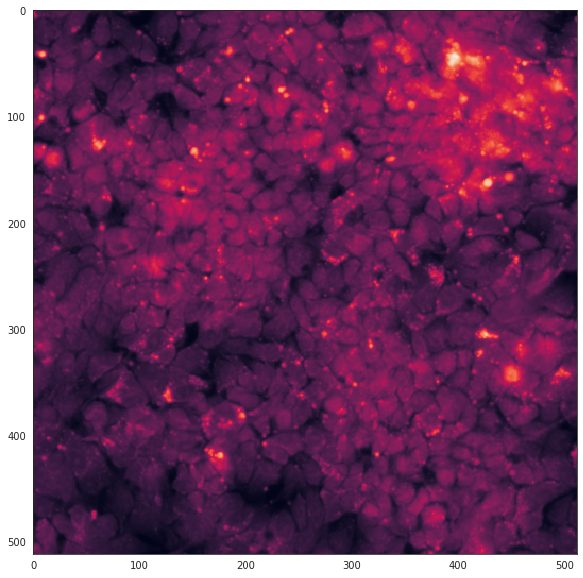

['../data/rx/valid/HEPG2-01/Plate4/O19_s2_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s2_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s2_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s2_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s2_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O19_s2_w6.png']
[[36.5        41.66666667 42.         ... 17.16666667 17.33333333
  17.83333333]
 [35.5        40.5        41.33333333 ... 18.5        18.66666667
  19.        ]
 [32.16666667 35.83333333 37.33333333 ... 20.83333333 19.66666667
  20.16666667]
 ...
 [23.5        22.5        23.33333333 ... 12.5        15.5
  20.33333333]
 [21.83333333 22.33333333 22.33333333 ... 11.16666667 13.66666667
  18.5       ]
 [22.         21.16666667 20.83333333 ... 10.         12.83333333
  17.16666667]]


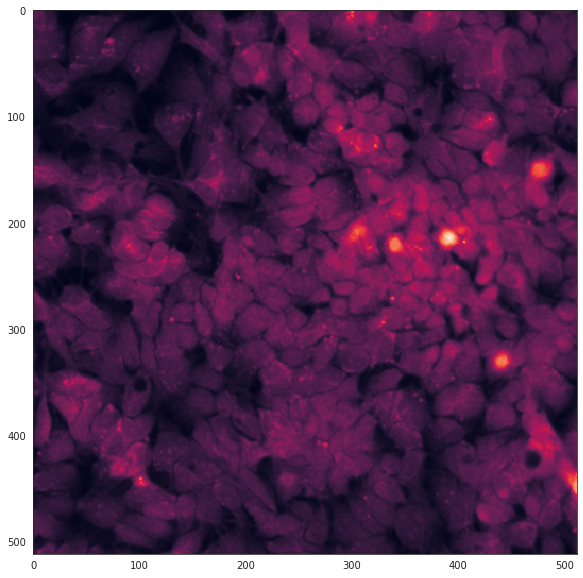

['../data/rx/valid/HEPG2-01/Plate4/O20_s1_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s1_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s1_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s1_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s1_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s1_w6.png']
[[61.         60.33333333 56.33333333 ... 29.16666667 28.83333333
  31.5       ]
 [61.66666667 62.16666667 60.66666667 ... 29.33333333 28.83333333
  31.        ]
 [61.         60.66666667 61.16666667 ... 29.66666667 29.
  29.66666667]
 ...
 [48.66666667 44.83333333 41.         ... 24.16666667 22.5
  21.5       ]
 [45.16666667 42.66666667 39.33333333 ... 21.33333333 20.5
  22.5       ]
 [38.33333333 37.83333333 37.         ... 20.83333333 22.
  26.        ]]


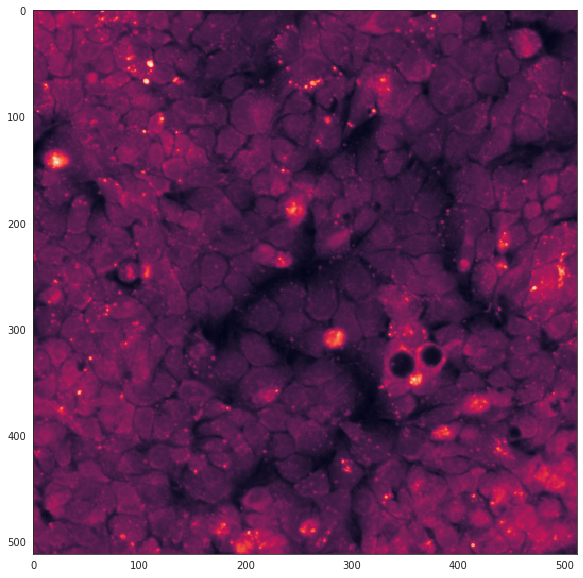

['../data/rx/valid/HEPG2-01/Plate4/O20_s2_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s2_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s2_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s2_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s2_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O20_s2_w6.png']
[[37.         38.83333333 43.66666667 ... 22.83333333 24.83333333
  25.16666667]
 [38.33333333 40.5        42.66666667 ... 23.16666667 23.83333333
  25.33333333]
 [39.83333333 43.         45.66666667 ... 23.33333333 22.66666667
  23.33333333]
 ...
 [30.66666667 36.33333333 43.         ... 23.33333333 24.5
  28.5       ]
 [27.16666667 32.33333333 36.16666667 ... 24.66666667 26.83333333
  30.        ]
 [26.83333333 31.5        32.33333333 ... 25.5        27.
  30.66666667]]


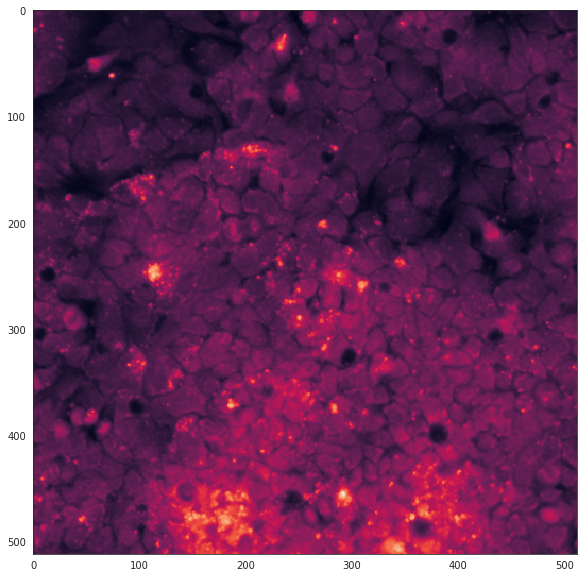

['../data/rx/valid/HEPG2-01/Plate4/O21_s1_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s1_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s1_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s1_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s1_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s1_w6.png']
[[11.66666667 12.16666667 12.33333333 ... 27.         26.83333333
  26.16666667]
 [11.83333333 12.33333333 12.33333333 ... 25.33333333 25.5
  24.33333333]
 [12.33333333 12.16666667 11.83333333 ... 24.83333333 25.
  25.33333333]
 ...
 [ 7.33333333  6.83333333  6.5        ... 14.33333333 13.16666667
  10.16666667]
 [ 7.16666667  6.5         6.5        ... 13.5        12.16666667
  10.        ]
 [ 6.66666667  6.5         6.5        ... 11.66666667 10.33333333
   8.83333333]]


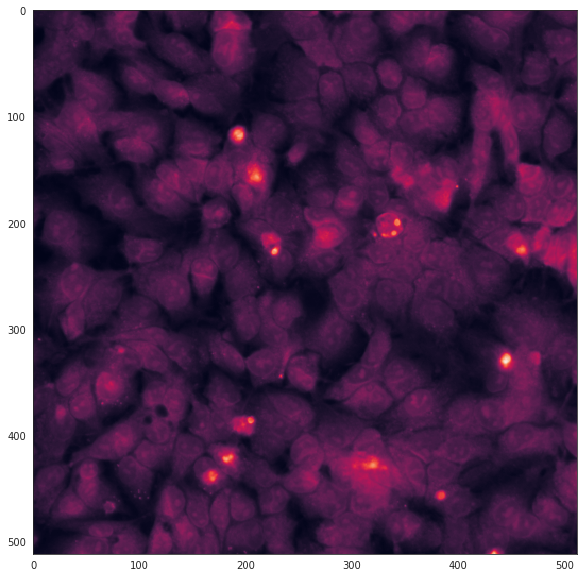

['../data/rx/valid/HEPG2-01/Plate4/O21_s2_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s2_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s2_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s2_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s2_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O21_s2_w6.png']
[[70.66666667 68.5        67.66666667 ... 19.33333333 20.5
  21.33333333]
 [76.83333333 72.83333333 69.5        ... 19.5        20.16666667
  21.16666667]
 [80.66666667 79.         73.66666667 ... 20.5        20.83333333
  21.16666667]
 ...
 [12.         11.66666667 11.5        ... 14.33333333 14.5
  14.83333333]
 [ 8.5         8.33333333  8.33333333 ... 15.33333333 16.
  16.        ]
 [ 7.          6.66666667  6.33333333 ... 16.33333333 16.66666667
  16.83333333]]


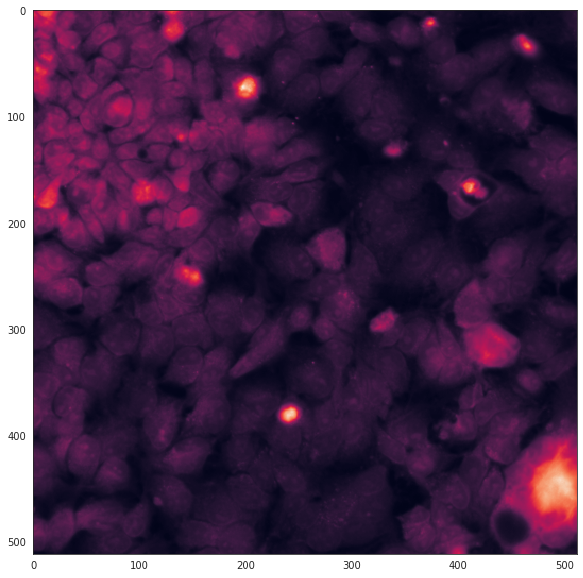

['../data/rx/valid/HEPG2-01/Plate4/O22_s1_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s1_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s1_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s1_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s1_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s1_w6.png']
[[33.16666667 29.16666667 28.66666667 ... 48.5        48.
  48.5       ]
 [37.83333333 31.33333333 28.33333333 ... 46.66666667 46.
  46.83333333]
 [44.         37.33333333 31.33333333 ... 45.83333333 45.
  46.5       ]
 ...
 [41.83333333 40.         38.33333333 ... 57.83333333 58.66666667
  60.83333333]
 [45.5        44.         41.66666667 ... 58.33333333 61.16666667
  64.16666667]
 [47.83333333 49.33333333 46.         ... 61.         63.83333333
  65.66666667]]


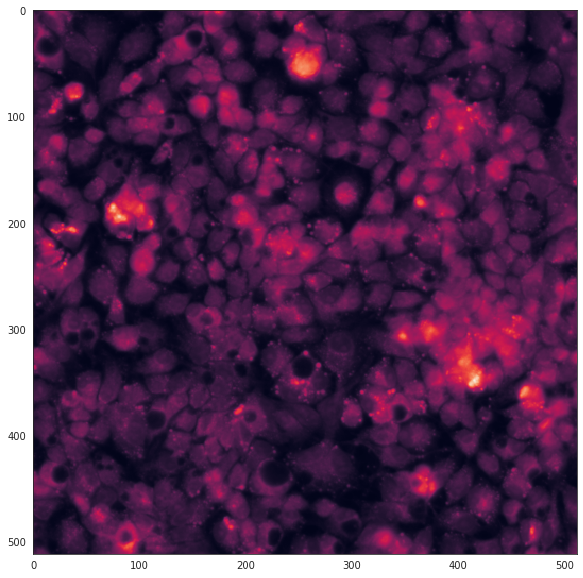

['../data/rx/valid/HEPG2-01/Plate4/O22_s2_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s2_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s2_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s2_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s2_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O22_s2_w6.png']
[[15.5        15.83333333 15.16666667 ...  6.66666667  6.66666667
   7.        ]
 [18.83333333 17.33333333 17.5        ...  8.66666667  8.83333333
   9.16666667]
 [20.66666667 19.83333333 19.83333333 ...  9.5        10.5
  12.16666667]
 ...
 [36.5        36.5        37.         ... 60.33333333 61.33333333
  56.33333333]
 [39.16666667 39.66666667 40.33333333 ... 63.         60.
  54.33333333]
 [43.16666667 43.66666667 44.66666667 ... 61.66666667 56.
  49.        ]]


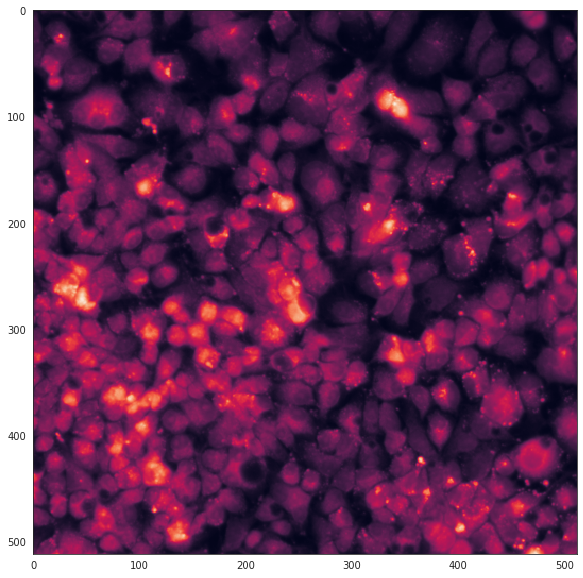

['../data/rx/valid/HEPG2-01/Plate4/O23_s1_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s1_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s1_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s1_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s1_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s1_w6.png']
[[ 36.66666667  35.33333333  34.16666667 ... 123.33333333 124.83333333
  126.        ]
 [ 36.5         35.          33.83333333 ... 124.5        128.66666667
  128.16666667]
 [ 37.16666667  35.66666667  34.66666667 ... 126.66666667 130.83333333
  128.        ]
 ...
 [ 40.66666667  44.83333333  44.33333333 ...  98.66666667  96.33333333
   88.5       ]
 [ 42.66666667  44.          41.         ...  84.83333333  85.5
   84.        ]
 [ 42.33333333  41.5         39.33333333 ...  80.33333333  81.33333333
   82.83333333]]


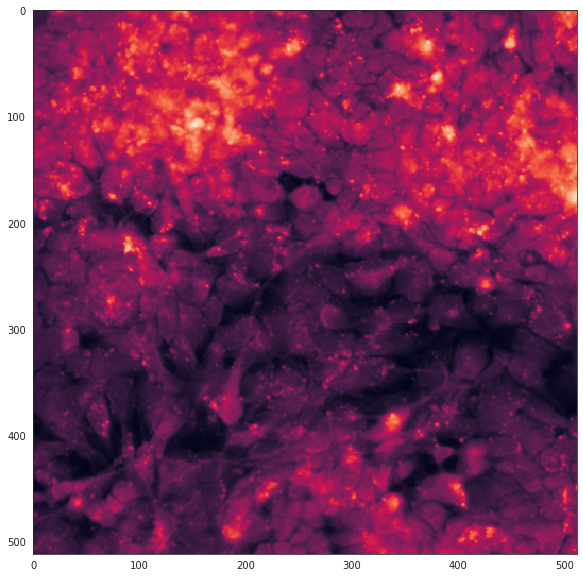

['../data/rx/valid/HEPG2-01/Plate4/O23_s2_w1.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s2_w2.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s2_w3.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s2_w4.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s2_w5.png', '../data/rx/valid/HEPG2-01/Plate4/O23_s2_w6.png']
[[103.33333333 106.66666667 111.66666667 ...  25.16666667  23.16666667
   22.5       ]
 [104.33333333 105.33333333 107.5        ...  23.33333333  22.33333333
   23.16666667]
 [106.66666667 106.33333333 105.16666667 ...  20.5         20.5
   22.33333333]
 ...
 [ 30.16666667  25.          22.5        ...  36.5         36.83333333
   36.33333333]
 [ 35.          28.          24.33333333 ...  35.16666667  36.
   36.        ]
 [ 41.5         32.5         26.66666667 ...  33.16666667  33.66666667
   34.16666667]]


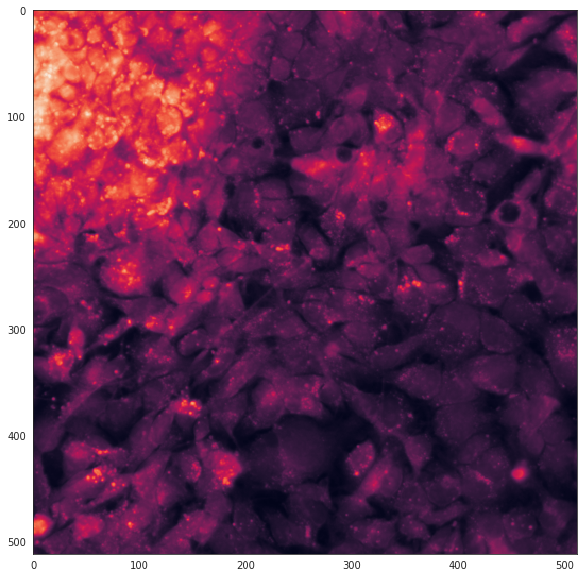

In [13]:
for (idx, row) in new_valid[:5].iterrows():
    paths_sets = rec_mk_img_paths(row, '../data/rx/valid')
    
    for paths in paths_sets:
        print(paths)
        hr_image_raw = np.stack([
            cv2.imread(img, -1) for img in paths
        ], axis=-1).mean(-1)
        
        print(hr_image_raw)
        
        hr_image = Image.fromarray(hr_image_raw)
        plt.figure(figsize=(10, 10))
        plt.imshow(hr_image)
        plt.show()
    